In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import os

In [2]:
df=pd.read_csv("Carbon Emission.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [4]:
df.isnull().sum()


Body Type                           0
Sex                                 0
Diet                                0
How Often Shower                    0
Heating Energy Source               0
Transport                           0
Vehicle Type                     6721
Social Activity                     0
Monthly Grocery Bill                0
Frequency of Traveling by Air       0
Vehicle Monthly Distance Km         0
Waste Bag Size                      0
Waste Bag Weekly Count              0
How Long TV PC Daily Hour           0
How Many New Clothes Monthly        0
How Long Internet Daily Hour        0
Energy efficiency                   0
CarbonEmission                      0
dtype: int64

In [5]:
# REPLACE THE MISSING VALUES WITH PETROL:dISEL:ELECTRIC IN 4:3:3 RATION not in order but randomly

missing_count = df['Vehicle Type'].isna().sum()
count_petrol = int(missing_count * 0.4)
count_diesel = int(missing_count * 0.3)
count_electric = missing_count - (count_petrol + count_diesel)

fill_values = ['petrol'] * count_petrol + ['diesel'] * count_diesel + ['electric'] * count_electric
np.random.shuffle(fill_values)
df.loc[df['Vehicle Type'].isna(), 'Vehicle Type'] = fill_values

# 4. Identify columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'CarbonEmission' in categorical_cols:
    categorical_cols.remove('CarbonEmission')  # Target column excluded
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('CarbonEmission')

In [6]:
# 5. Split features and target
X = df.drop('CarbonEmission', axis=1)
y = df['CarbonEmission']


In [7]:
# 6. Define Column Transformer with OneHotEncoder for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical columns as-is
)

# 7. Apply transformations on features
X_encoded = preprocessor.fit_transform(X)

In [8]:
# 8. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [9]:
# 9. Train RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
# 10. Predict and evaluate
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [11]:
print(f"Train R² Score: {r2_score(y_train, train_pred):.4f}")
print(f"Test R² Score: {r2_score(y_test, test_pred):.4f}")

Train R² Score: 0.9886
Test R² Score: 0.9223


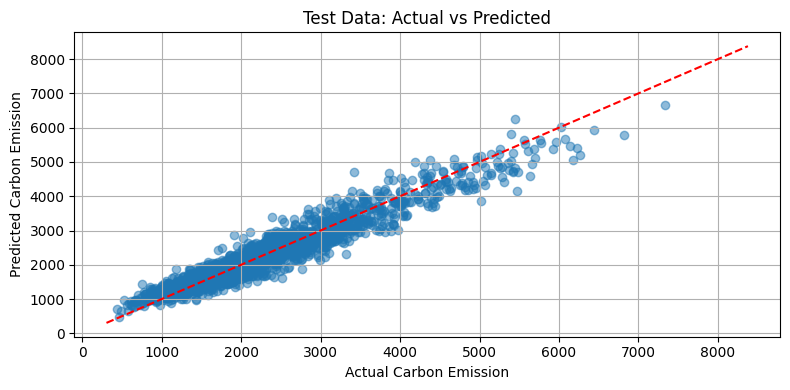

In [12]:
# 11. Plot Actual vs Predicted values for test set
plt.figure(figsize=(8, 4))
plt.scatter(y_test, test_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Carbon Emission")
plt.ylabel("Predicted Carbon Emission")
plt.title("Test Data: Actual vs Predicted")
plt.grid()
plt.tight_layout()

In [13]:
# Create folder if not exists and save plot
os.makedirs("model", exist_ok=True)
plt.savefig("model/performance_plot.png")

<Figure size 640x480 with 0 Axes>

In [14]:
# 12. Save the trained model and preprocessor
joblib.dump(model, "model/carbon_model.pkl")
joblib.dump(preprocessor, "model/encoder.pkl")

['model/encoder.pkl']